In [88]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [89]:
for i in range(8):
        if i==0:
            train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        else:
            temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
            train=pd.concat([train,temp])

In [90]:
train.columns

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes', 'm_ea',
       'CLASS'],
      dtype='object')

<Axes: title={'center': 'm_ea'}, xlabel='CLASS'>

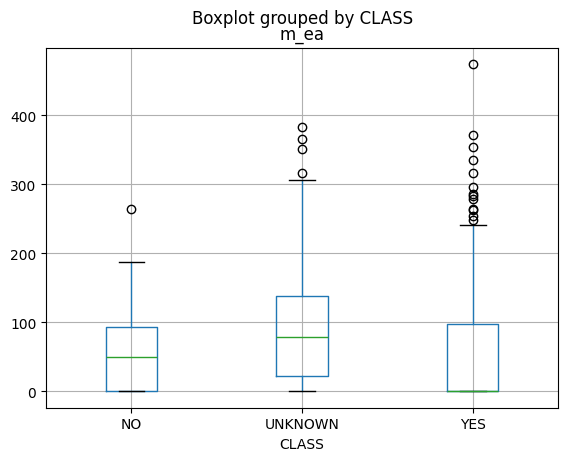

In [128]:
train.boxplot(by="CLASS",column=["m_ea"])

<Axes: title={'center': 'm_earth'}, xlabel='CLASS'>

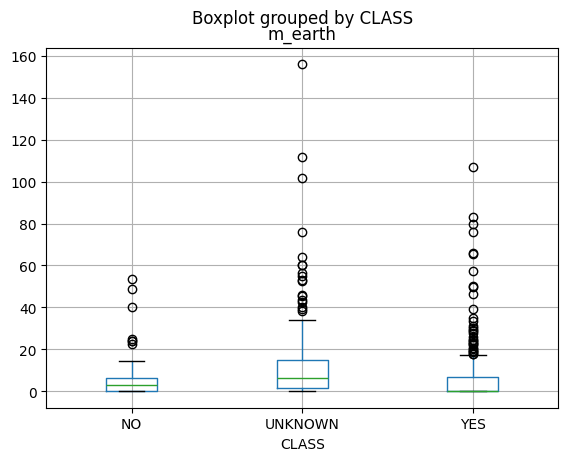

In [129]:
train.boxplot(by="CLASS",column=["m_earth"])

array([[<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>,
        <Axes: title={'center': 'entropias'}, xlabel='CLASS'>],
       [<Axes: title={'center': 'm_earth'}, xlabel='CLASS'>, <Axes: >]],
      dtype=object)

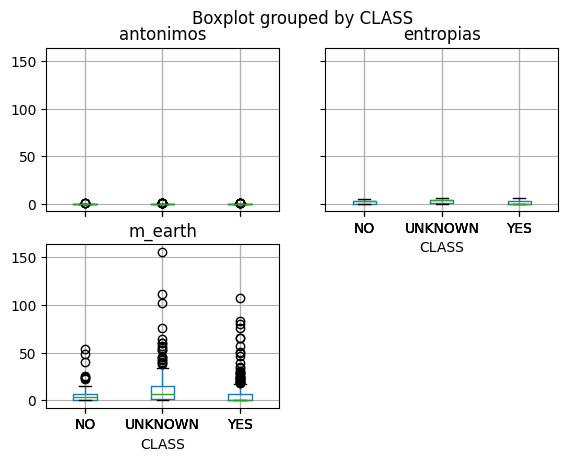

In [92]:
train.boxplot(by="CLASS",column=["antonimos","entropias","m_earth"])

In [93]:
# train=train.drop(["distancias","antonimos","relaciones","entropias","suma"],axis=1)
# train

In [94]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [95]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [96]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

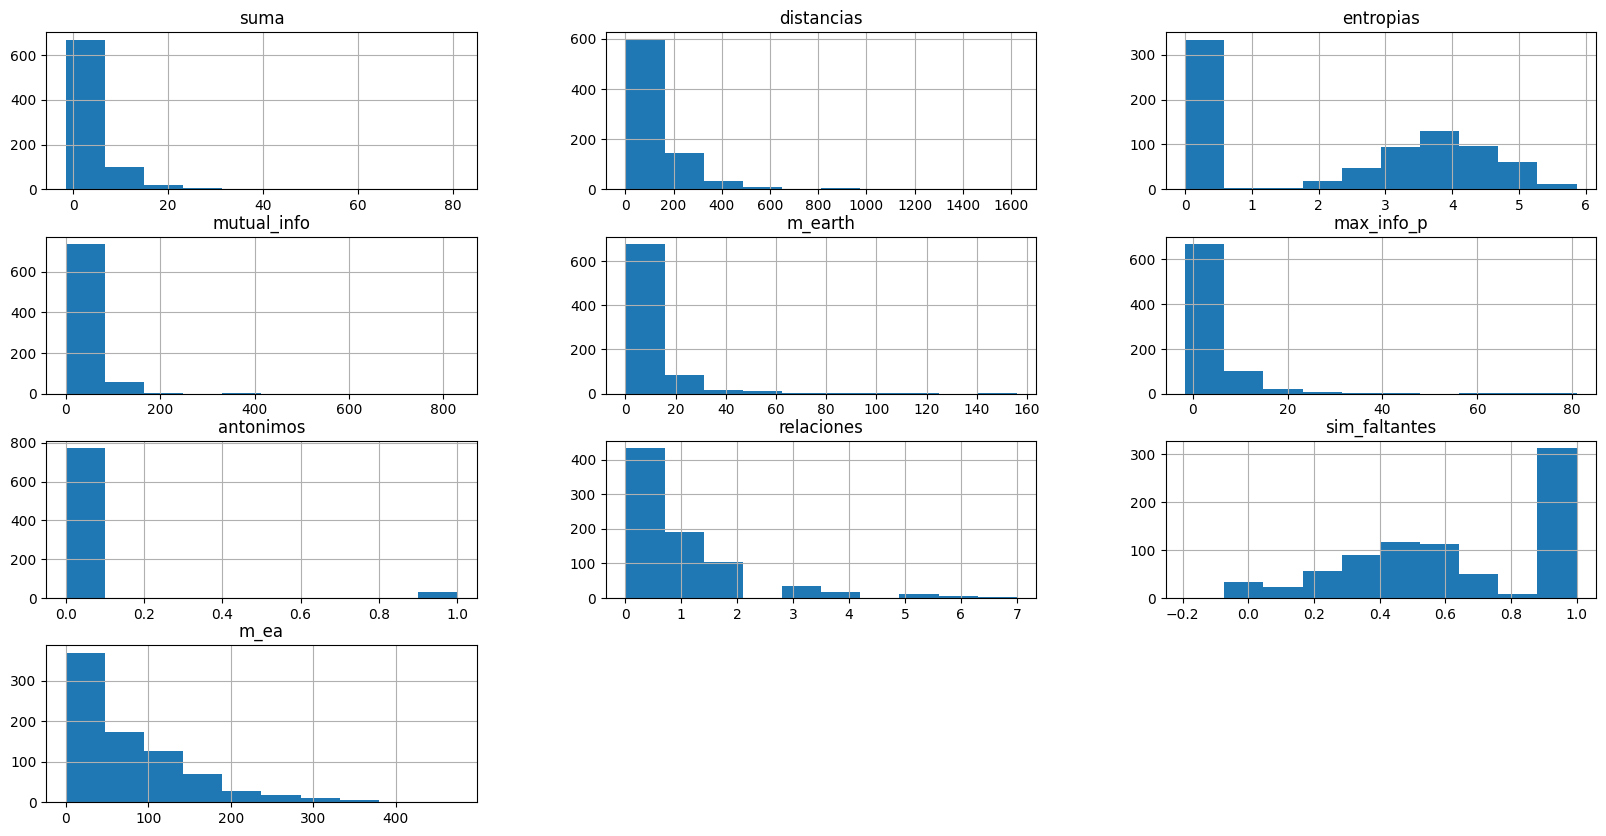

In [97]:
train.hist(figsize=(20,10))
plt.show()

In [98]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [99]:
# test=test.drop(["distancias","antonimos","relaciones","entropias","suma"],axis=1)
# test

array([[<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>,
        <Axes: title={'center': 'm_earth'}, xlabel='CLASS'>],
       [<Axes: title={'center': 'entropias'}, xlabel='CLASS'>, <Axes: >]],
      dtype=object)

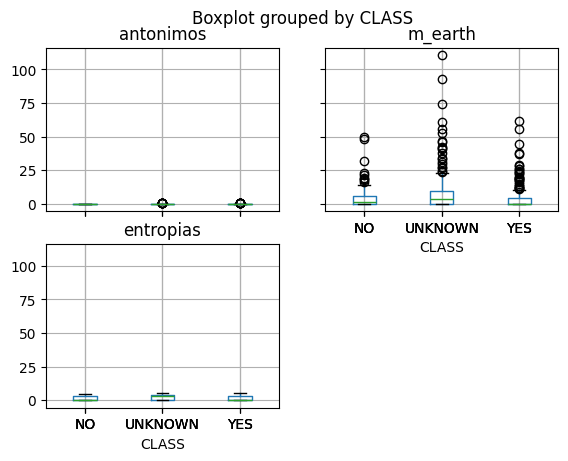

In [100]:
test.boxplot(by="CLASS",column=["antonimos","m_earth","entropias"])

In [101]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [102]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [103]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [104]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [105]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [106]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [107]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [108]:
model.decision_function(X)

array([ 9.48645853e-01, -6.27410194e-01,  4.16910462e-01,  9.48645853e-01,
       -1.66450484e-01,  6.82778157e-01,  9.48645853e-01,  6.82778157e-01,
       -1.04217382e-01, -1.43676506e+00,  6.82778157e-01,  9.48645853e-01,
        2.46566508e-01,  3.85862775e-01,  8.96156580e-01,  9.48645853e-01,
        4.16910462e-01,  2.33178743e-01,  1.56760759e-01,  3.85220592e-01,
       -4.39219019e-02,  6.82778157e-01,  6.82778157e-01,  6.82778157e-01,
       -1.41060812e-01,  4.16910462e-01,  6.82778157e-01, -9.99360233e-02,
        1.45482978e-01,  2.42767395e-01,  3.24862625e-01,  4.16910462e-01,
        2.99593309e-01,  2.30618763e-01,  6.82778157e-01,  6.82778157e-01,
        4.16910462e-01,  2.82403328e-01,  1.79785339e-02,  9.48645853e-01,
        9.48645853e-01,  1.17771346e-01, -3.20999122e-01,  2.32727548e-01,
        4.16910462e-01,  2.09546585e-01,  6.82778157e-01,  4.16910462e-01,
        9.48645853e-01,  6.82778157e-01, -4.69895244e-01,  5.71693733e-02,
       -7.11477372e-01,  

In [109]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes', 'm_ea'],
      dtype='object')

In [110]:
model.classes_

array([0, 1])

In [111]:
model.coef_[0]

array([ 0.01904818, -0.43378299, -0.2712415 , -0.32986604,  0.05509488,
        0.01904818, -0.03875871, -0.32859139,  0.1388822 ,  0.2174917 ])

In [112]:
coeficientes=model.coef_[0]

In [113]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  9 m_ea 1 distancias


In [114]:
n_columns=train.shape[1]-1

In [115]:
n_columns

10

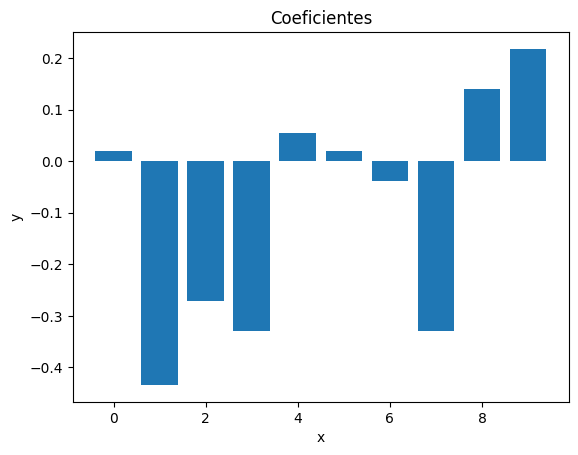

In [116]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [117]:
predictions = model.predict(X_test)

In [118]:
print(confusion_matrix(y_test, predictions))

[[209 181]
 [145 265]]


In [119]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.59
recall 0.65
f1_score:  0.62
matthews_score:  0.18


In [120]:
X_train.shape

(800, 10)

In [121]:
X_test.shape

(800, 10)

In [122]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [123]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [124]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.600000 (0.078383)


In [125]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.680000 (0.088170)


In [126]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.630000 (0.070713)


In [127]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.210000 (0.136390)
